# Data visualization

## Exploratory data analysis

## Univariate data

* sample vs population

## Categorical data

* tabular analysis of frequency

<img src="https://miro.medium.com/max/1044/1*g3RFKtbpbCY8HaM2eEpGTA.png" width="50%">

## Quantitative data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/victor/work/lora/data/packet_error/phase8_lorahost_pkts.csv')

In [10]:
data.columns

Index(['Unnamed: 0', 'UTC timestamp', 'us count', 'frequency', 'status',
       'size', 'datarate', 'coderate', 'RSSI', 'SNR', 'SNRMIN', 'SNRMAX',
       'payload', 'pld-hdr'],
      dtype='object')

In [4]:
univar = data['RSSI']

### Histogram

* representation of the sample distribution

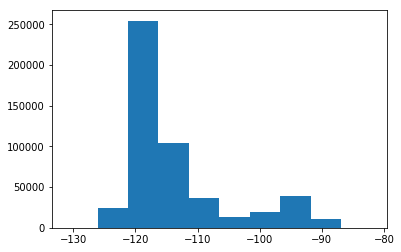

In [32]:
_ = plt.hist(univar)

### Histogram bins: width and number

* the bin width acts as a smoothing factor for the distribution

Text(0.5, 1.0, 'Bin width=10 units')

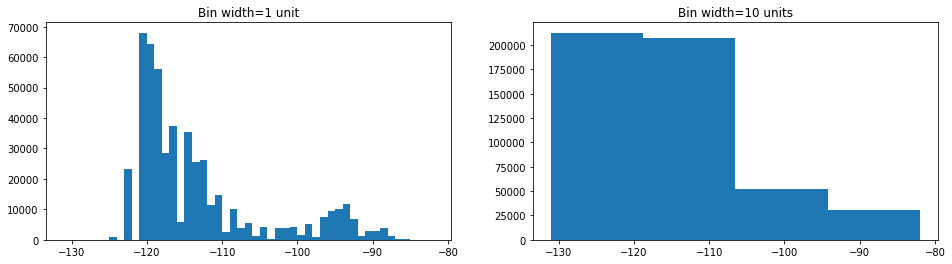

In [22]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.hist(univar, bins=univar.max()-univar.min())
plt.title('Bin width=1 unit')
plt.subplot(1,2,2)
plt.hist(univar, bins=int((univar.max()-univar.min())/10))
plt.title('Bin width=10 units')

### Histogram bins: Scott's normal reference rule

* histograms are a discrete approximation of the continuous distribution
* as the number of samples $\to \infty$ the histogram should show the continuous distribution
* Scott's rule selects the bin width to minimize the difference between the histogram and the density estimate

$h = \frac{3.5\sigma}{\sqrt[3]{n}}$

In [30]:
binwidth = 3.5*np.std(univar)/np.power(len(univar), 1/3)
binwidth

0.3849119161563253

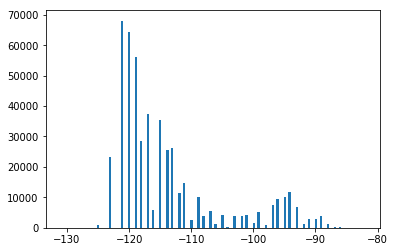

In [31]:
_ = plt.hist(univar, bins=int((univar.max()-univar.min())/binwidth))

* What's happening?
* Scott's rule is designed for __normally__ distributed data
* there are other bin width selection rules for non-normal data.

### Mean

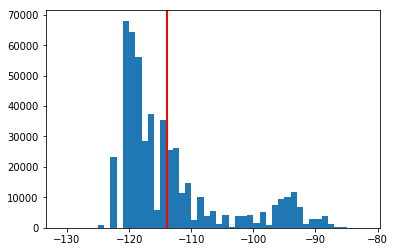

In [33]:
_ = plt.hist(univar, bins=int((univar.max()-univar.min())))
plt.axvline(np.mean(univar), color='red', linewidth=2)

### Median

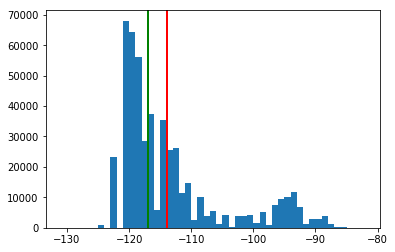

In [35]:
_ = plt.hist(univar, bins=int((univar.max()-univar.min())))
plt.axvline(np.mean(univar), color='red', linewidth=2)
plt.axvline(np.median(univar), color='green', linewidth=2)

### Robustness

* a statistic is robust if moving some of the data will not affect the statistic

### The median is robust

-117.0 -115.0


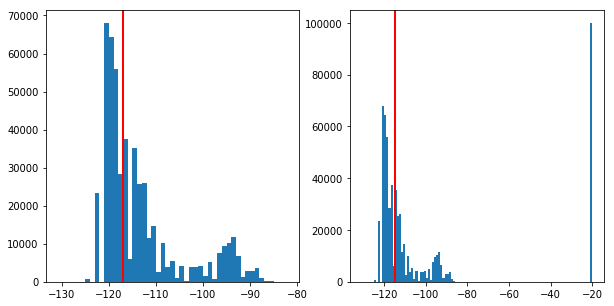

In [53]:
univar_copy = list(univar)
univar_copy.extend([-20]*100000)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(univar, bins=univar.max()-univar.min())
plt.axvline(np.median(univar), color='red', linewidth=2)
plt.subplot(1,2,2)
plt.hist(univar_copy, bins=max(univar_copy)-min(univar_copy))
plt.axvline(np.median(univar_copy), color='red', linewidth=2)
print(np.median(univar), np.median(univar_copy))

### The mean is not robust

-113.90436855626508 -98.31917619742318


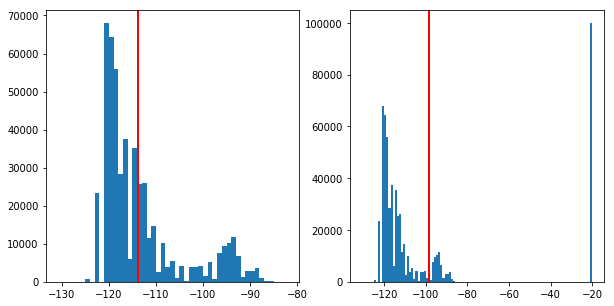

In [54]:
univar_copy = list(univar)
univar_copy.extend([-20]*100000)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(univar, bins=univar.max()-univar.min())
plt.axvline(np.mean(univar), color='red', linewidth=2)
plt.subplot(1,2,2)
plt.hist(univar_copy, bins=max(univar_copy)-min(univar_copy))
plt.axvline(np.mean(univar_copy), color='red', linewidth=2)
print(np.mean(univar), np.mean(univar_copy))

### Box and whiskers plot

![Box and whiskers](https://publiclab.org/system/images/photos/000/032/980/original/Screen_Shot_2019-06-18_at_10.27.45_AM.png)

### Box and whiskers plot, what does it show?

Properties of the distribution
* spread (Inter-Quartile Range)
* skewness
* kurtosis
* tails (heavy left-right)

In [9]:
plt.boxplot?

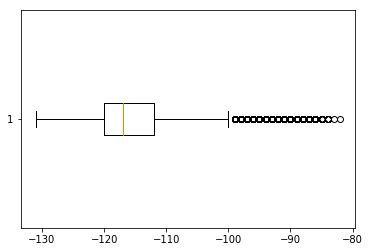

In [7]:
_=plt.boxplot(univar, vert=False)

The whiskers are placed by default at $Q_1-1.5IQR$ and $Q_2+1.5IQR$. They can be changed for example to reflect the $[5,95]$ percentile interval

Anything outside these values is considered outlier.

### Quantile-quantile plot

Analysis of the normality of the data.

<img width=50% src="https://www.mathworks.com/help/examples/stats/win64/QuantileQuantilePlotForNormalDistributionExample_01.png">

How it works:
* plot the data against a normal distribution with the same mean and std dev
* if the data is normal there will be a linear correlation.

### Q-Q plot: normally distributed data

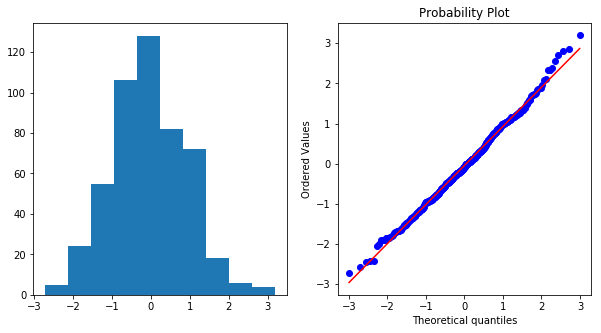

In [31]:
import scipy.stats as stats

seq1 = np.random.normal(0, 1, 500)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq1)
plt.subplot(1,2,2)
_=stats.probplot(seq1, dist="norm", plot=plt)

### Q-Q plot: right skewed normal distribution

* distribution has a long __right__ tail
* also known as __positive__ skew

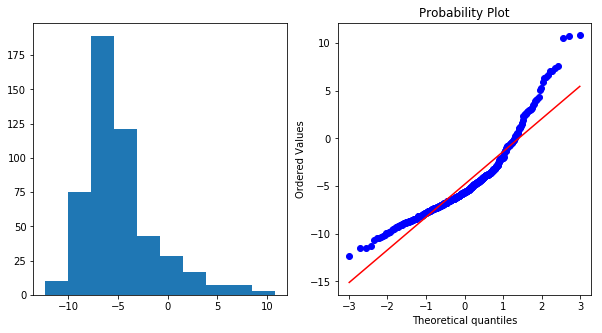

In [63]:
import scipy.stats as stats

seq1 = np.random.normal(0, 4, 100)
seq2 = np.random.normal(-6,2, 400)
seq3 = np.concatenate((seq1, seq2))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq3)
plt.subplot(1,2,2)
_=stats.probplot(seq3, dist="norm", plot=plt)

### Q-Q plot: left skewed normal distribution

* distribution has a long __left__ tail
* also known as __negative__ skew

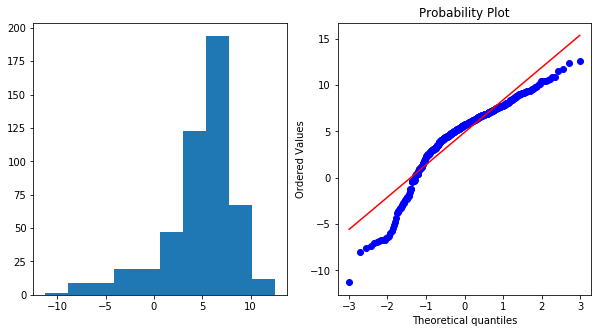

In [65]:
import scipy.stats as stats

seq1 = np.random.normal(0, 4, 100)
seq2 = np.random.normal(6,2,400)
seq3 = np.concatenate((seq1, seq2))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq3)
plt.subplot(1,2,2)
_=stats.probplot(seq3, dist="norm", plot=plt)

### Q-Q plot: kurtosis

* leptokurtic distribution
* also known as positive excess kurtosis

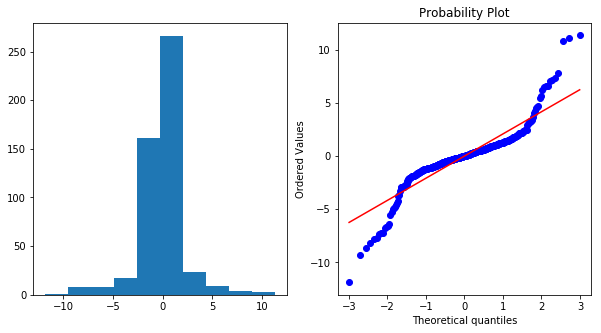

In [66]:
import scipy.stats as stats

seq1 = np.random.normal(0, 4, 100)
seq2 = np.random.normal(0, 1, 400)
seq3 = np.concatenate((seq1, seq2))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq3)
plt.subplot(1,2,2)
_=stats.probplot(seq3, dist="norm", plot=plt)

### Data scale and changing the scale

* sometimes the data is polarized between a few very large values and lots of small values

In [68]:
from datetime import datetime
timestamps = data['UTC timestamp'].apply(lambda s: datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%fZ").timestamp())

ipi = np.diff(timestamps)

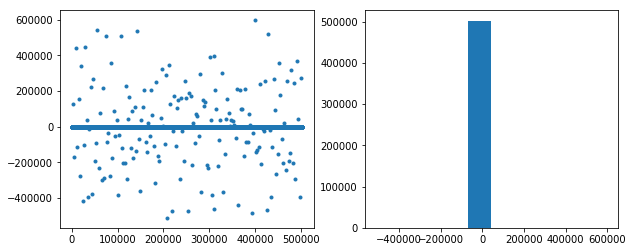

In [69]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ipi, '.')
plt.subplot(1,2,2)
_=plt.hist(ipi)

### Data scale and changing the scale

* in these cases it's useful to change the scale to logarithmic
* this will clearly show the distribution of the data

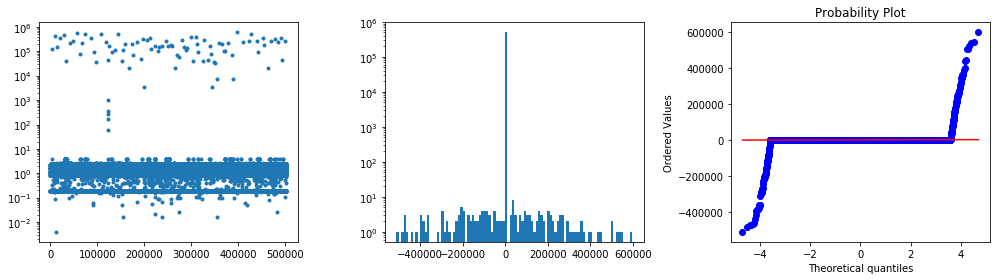

In [76]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(ipi, '.')
plt.yscale('log')
plt.subplot(1,3,2)
_=plt.hist(ipi, bins=100)
plt.yscale('log')
plt.subplot(1,3,3)
_=stats.probplot(ipi, dist='norm', plot=plt)
plt.tight_layout()

# Multivariate data

In [77]:
data.columns

Index(['Unnamed: 0', 'UTC timestamp', 'us count', 'frequency', 'status',
       'size', 'datarate', 'coderate', 'RSSI', 'SNR', 'SNRMIN', 'SNRMAX',
       'payload', 'pld-hdr'],
      dtype='object')

In [79]:
data['status'].value_counts()

CRC_OK     490571
CRC_BAD     11952
Name: status, dtype: int64

In [80]:
data['datarate'].value_counts()

SF12      101725
SF10      101555
SF9       101341
SF8       100321
SF7        97581
Name: datarate, dtype: int64

### Categorical data: frequency analysis

In [5]:
cat_data = pd.DataFrame({'status': data['status'], 'datarate': data['datarate']})

In [6]:
cat_data.groupby(["datarate", "status"]).size()

datarate  status 
SF10      CRC_BAD       793
          CRC_OK     100762
SF12      CRC_OK     101725
SF7       CRC_BAD      6064
          CRC_OK      91517
SF8       CRC_BAD      3554
          CRC_OK      96767
SF9       CRC_BAD      1541
          CRC_OK      99800
dtype: int64

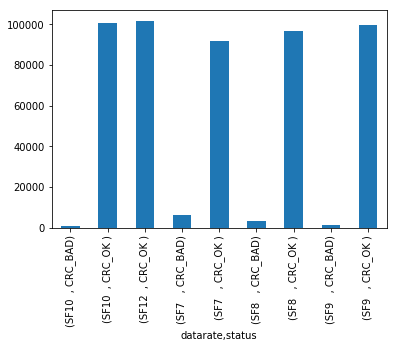

In [31]:
cat_data.groupby(["datarate", "status"]).size().plot.bar()

### Ordinal and mixed data

In [33]:
cat_data = pd.DataFrame({'status': data['status'], 'datarate': data['datarate'], 'snr':data['SNR']})

In [34]:
cat_data.groupby(["datarate", "status"]).describe()

snr                                                   
                     count       mean       std   min   25%   50%   75%   max
datarate status                                                              
SF10     CRC_BAD     793.0  -6.798108  7.977086 -20.8 -15.0  -6.8   0.8   8.2
         CRC_OK   100762.0   0.907127  5.442551 -17.2  -2.8   2.2   5.2  11.0
SF12     CRC_OK   101725.0   6.721348  0.951567  -8.8   6.2   6.8   7.2  10.8
SF7      CRC_BAD    6064.0  -8.429436  2.441189 -15.0  -9.8  -8.8  -7.8   5.5
         CRC_OK    91517.0   1.434059  4.166420 -10.2  -1.5   2.2   4.8   9.8
SF8      CRC_BAD    3554.0 -10.216601  3.825760 -16.8 -12.0 -11.2 -10.5   7.5
         CRC_OK    96767.0   1.443746  4.991530 -12.5  -2.2   2.2   5.2  11.0
SF9      CRC_BAD    1541.0  -9.430500  6.340076 -17.2 -14.0 -12.8  -5.0   7.5
         CRC_OK    99800.0   1.284443  5.526988 -15.8  -2.5   2.2   5.5  12.2

### Mosaic plot

<img src="https://miro.medium.com/max/1636/1*HQ-9olYMSoy-MA2eHQFO7w.png" width=50%/>

* useful for understanding relations and levels for categorical and mixed data
* available in Python through the __statsmodel__ module

### Cross-tabulation

In [50]:
pd.crosstab(data['status'], [data['datarate'], data['SNR'].apply(lambda x: int(x/10))], normalize='columns')

datarate SF10                            SF12           SF7               \
SNR          -2        -1         0    1      0    1        -1         0   
status                                                                     
CRC_BAD     1.0  0.060618  0.004973  0.0    0.0  0.0  0.997575  0.050133   
CRC_OK      0.0  0.939382  0.995027  1.0    1.0  1.0  0.002425  0.949867   

datarate    SF8                      SF9                    
SNR             -1         0    1        -1         0    1  
status                                                      
CRC_BAD   0.756477  0.006603  0.0  0.205102  0.005622  0.0  
CRC_OK    0.243523  0.993397  1.0  0.794898  0.994378  1.0

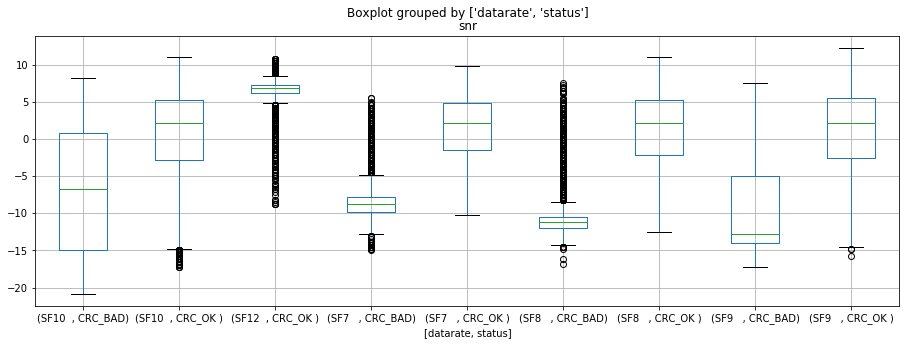

In [36]:
_=cat_data.boxplot(by=['datarate', 'status'], figsize=(15,5))

In [82]:
data['SF'] = data['datarate'].apply(lambda x: int(x.strip()[2:]))
data['status'] = data['status'].apply(lambda x: x.strip())

In [99]:
crc_ok = [data['SNR'][(data['SF']==d) & (data['status']=='CRC_OK')] for d in np.unique(data['SF'].values)]
crc_bad = [data['SNR'][(data['SF']==d) & (data['status']=='CRC_BAD')] for d in np.unique(data['SF'].values)]

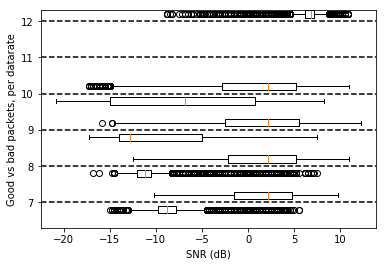

In [107]:
_=plt.boxplot(crc_ok, vert=False, positions=[d+0.2 for d in np.unique(data['SF'].values)], widths=[0.2]*len(np.unique(data['SF'].values)))
_=plt.boxplot(crc_bad, vert=False, positions=[d-0.2 for d in np.unique(data['SF'].values)], widths=[0.2]*len(np.unique(data['SF'].values)))
plt.xlabel('SNR (dB)')
plt.ylabel('Good vs bad packets, per datarate')
_=plt.yticks([7,8,9,10,11,12], [7,8,9,10,11,12])
for d in range(7,13):
    plt.axhline(d, color='k', linestyle='--')

### Correlation: scatterplot

In [120]:
corr_data = pd.DataFrame({'rssi':data['RSSI'], 'snr':data['SNR']})

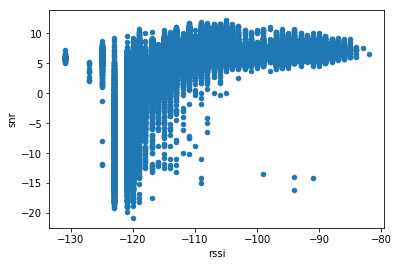

In [122]:
corr_data.plot.scatter(x='rssi', y='snr')